In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
# loading the data from csv file to Pandas DataFrame
bigmart_data = pd.read_csv('/content/Train.csv')

In [ ]:
# printing the first 5 rows of the dataframe
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# number of data points & number of features
bigmart_data.shape

(8523, 12)

In [ ]:
# getting some information about thye dataset
bigmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# check unique values in dataset
bigmart_data.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

Categorical Features:

1. Item_Identifier
2. Item_Fat_Content
3. Item_Type
4. Outlet_Identifier
5. Outlet_Size
6. Outlet_Location_Type
7. Outlet_Type

In [ ]:
# checking for missing values
bigmart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

In [ ]:
# mean value of "Item_Weight" column
bigmart_data['Item_Weight'].mean()

12.857645184136183

In [ ]:
# filling the missing values in "Item_weight column" with "Mean" value
bigmart_data['Item_Weight'].fillna(bigmart_data['Item_Weight'].mean(), inplace=True)

In [ ]:
miss_bool = bigmart_data['Item_Weight'].isnull()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [ ]:
# mode of "Outlet_Size" column
bigmart_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [ ]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = bigmart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [ ]:
print(mode_of_Outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [ ]:
miss_values = bigmart_data['Outlet_Size'].isnull()   
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [ ]:
bigmart_data.loc[miss_values, 'Outlet_Size'] = bigmart_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [ ]:
sum(bigmart_data['Item_Visibility']==0)

526

In [ ]:
# replace zeros with mean
bigmart_data.loc[:, 'Item_Visibility'].replace([0], [bigmart_data['Item_Visibility'].mean()], inplace=True)

In [ ]:
# create small values for establishment year
bigmart_data['Outlet_Years'] = 2013 - bigmart_data['Outlet_Establishment_Year']
bigmart_data['Outlet_Years']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Years, Length: 8523, dtype: int64

In [ ]:
# checking for missing values
bigmart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Years                 0
dtype: int64

In [ ]:
# combine item fat content
bigmart_data['Item_Fat_Content'] = bigmart_data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
bigmart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
bigmart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914,15.168133
std,4.226124,0.048742,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400,9.000000
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000,14.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


In [ ]:
#Creation of New Attributes
bigmart_data['New_Item_Type'] = bigmart_data['Item_Identifier'].apply(lambda x: x[:2])
bigmart_data['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [ ]:
bigmart_data['New_Item_Type'] = bigmart_data['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
bigmart_data['New_Item_Type'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: New_Item_Type, dtype: int64

In [ ]:
bigmart_data.loc[bigmart_data['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
bigmart_data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [ ]:
sns.set()

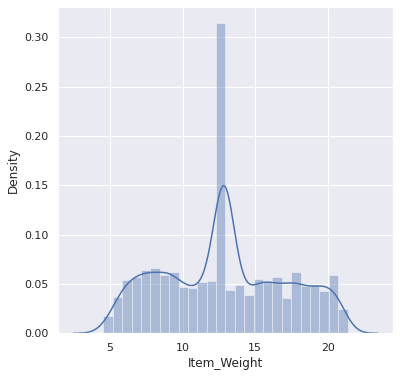

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_Weight'])
plt.show()

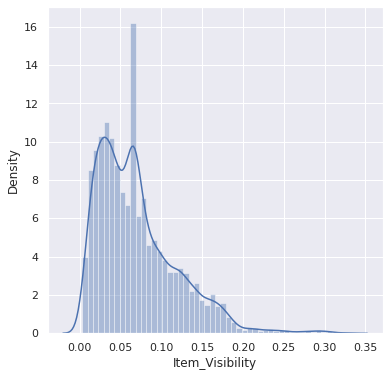

In [ ]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_Visibility'])
plt.show()

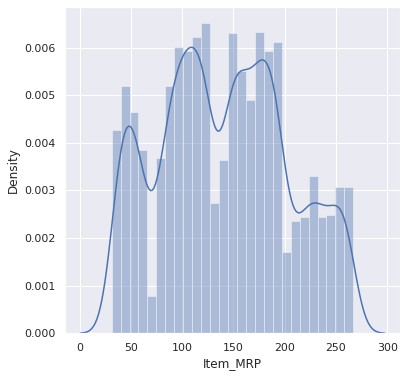

In [ ]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_MRP'])
plt.show()

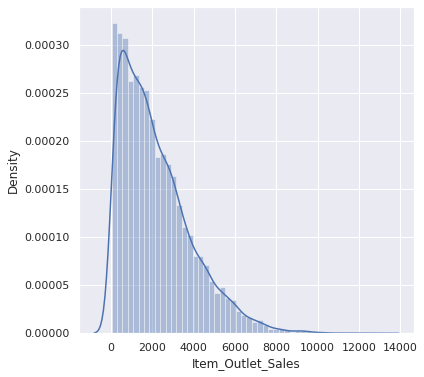

In [ ]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(bigmart_data['Item_Outlet_Sales'])
plt.show()

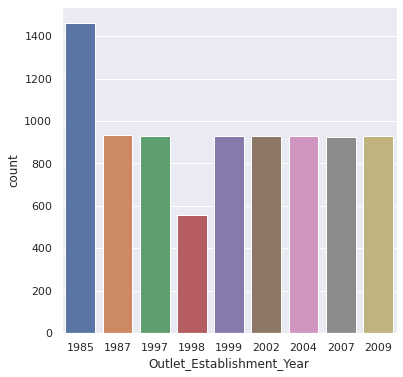

In [ ]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=bigmart_data)
plt.show()

Categorical Features

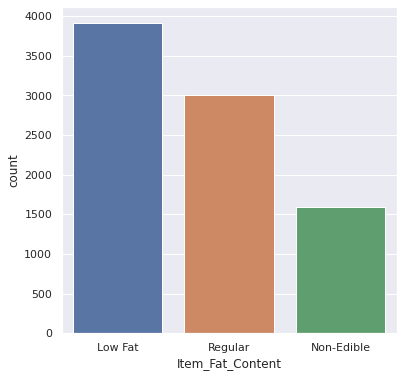

In [ ]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=bigmart_data)
plt.show()

[Text(0, 0, 'Dairy'),
 Text(0, 0, 'Soft Drinks'),
 Text(0, 0, 'Meat'),
 Text(0, 0, 'Fruits and Vegetables'),
 Text(0, 0, 'Household'),
 Text(0, 0, 'Baking Goods'),
 Text(0, 0, 'Snack Foods'),
 Text(0, 0, 'Frozen Foods'),
 Text(0, 0, 'Breakfast'),
 Text(0, 0, 'Health and Hygiene'),
 Text(0, 0, 'Hard Drinks'),
 Text(0, 0, 'Canned'),
 Text(0, 0, 'Breads'),
 Text(0, 0, 'Starchy Foods'),
 Text(0, 0, 'Others'),
 Text(0, 0, 'Seafood')]

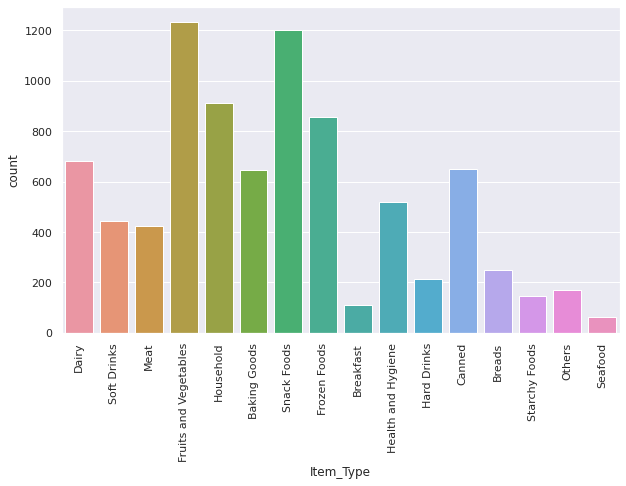

In [ ]:
# Item_Type column
l = list(bigmart_data['Item_Type'].unique())
plt.figure(figsize=(10,6))
chart = sns.countplot(x='Item_Type', data=bigmart_data)
chart.set_xticklabels(labels=l, rotation=90)

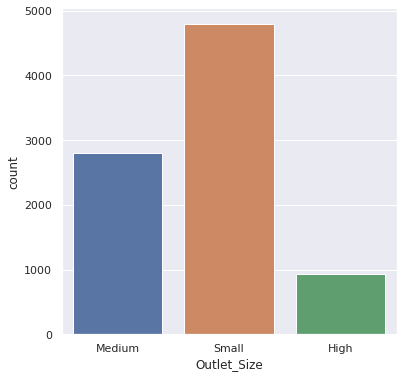

In [ ]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=bigmart_data)
plt.show()

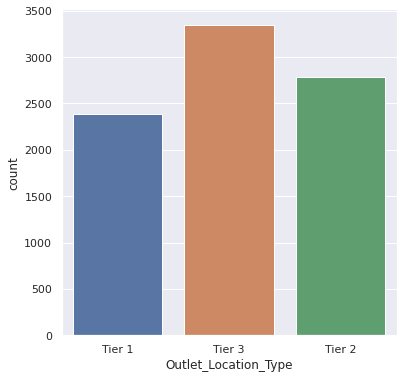

In [ ]:
# Outlet_Location_Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=bigmart_data)
plt.show()

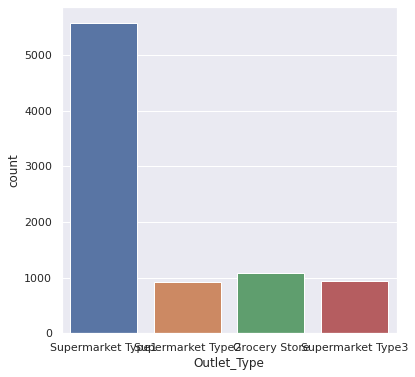

In [ ]:
# Outlet_Type column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Type', data=bigmart_data)
plt.show()

In [ ]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,15,Food
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,Non-Consumable


Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
encoder = LabelEncoder()

In [ ]:
bigmart_data['Item_Identifier'] = encoder.fit_transform(bigmart_data['Item_Identifier'])

bigmart_data['Item_Fat_Content'] = encoder.fit_transform(bigmart_data['Item_Fat_Content'])

bigmart_data['Item_Type'] = encoder.fit_transform(bigmart_data['Item_Type'])

bigmart_data['New_Item_Type'] = encoder.fit_transform(bigmart_data['New_Item_Type'])

bigmart_data['Outlet_Identifier'] = encoder.fit_transform(bigmart_data['Outlet_Identifier'])

bigmart_data['Outlet_Size'] = encoder.fit_transform(bigmart_data['Outlet_Size'])

bigmart_data['Outlet_Location_Type'] = encoder.fit_transform(bigmart_data['Outlet_Location_Type'])

bigmart_data['Outlet_Type'] = encoder.fit_transform(bigmart_data['Outlet_Type'])

In [ ]:
bigmart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years,New_Item_Type
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,14,1
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,4,0
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,14,1
3,1121,19.20,2,0.066132,6,182.0950,0,1998,2,2,0,732.3800,15,1
4,1297,8.93,1,0.066132,9,53.8614,1,1987,0,2,1,994.7052,26,2


Splitting features and Target

In [ ]:
X = bigmart_data.drop(['Item_Outlet_Sales', 'Item_Type', 'Outlet_Establishment_Year'], axis=1)
Y = bigmart_data['Item_Outlet_Sales']
print(X)
print(Y)

      Item_Identifier  Item_Weight  ...  Outlet_Years  New_Item_Type
0                 156        9.300  ...            14              1
1                   8        5.920  ...             4              0
2                 662       17.500  ...            14              1
3                1121       19.200  ...            15              1
4                1297        8.930  ...            26              2
...               ...          ...  ...           ...            ...
8518              370        6.865  ...            26              1
8519              897        8.380  ...            11              1
8520             1357       10.600  ...             9              2
8521              681        7.210  ...             4              1
8522               50       14.800  ...            16              0

[8523 rows x 11 columns]
0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
85

Splitting the data into Training data & Testing Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Model Training

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
predictions=model.predict(X_test)

In [ ]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(Y_test,predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(Y_test,predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,predictions)))
print('Explained Variance Score: ',metrics.explained_variance_score(Y_test,predictions))

Mean Absolute Error:  946.0866874195575
Mean Squared Error:  1577715.3818276855
Root Mean Squared Error:  1256.071407933357
Explained Variance Score:  0.48964899940015316


In [ ]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
model_pred = model.predict(X_test)

In [ ]:
model_pred

array([2523.82166217, 3615.96506487, 1182.65747017, ..., 2090.368194  ,
       4509.62788994, 3461.15411933])

In [ ]:
model_accuracy = round(model.score(X_train, Y_train) * 100)
model_accuracy

51